##  1. Create a file “people.txt” with the following data:
i) Read the data from the file “people.txt”.

ii) Create a ruleset E that contain rules to check for the following conditions:
1. The age should be in the range 0-150.
2. The age should be greater than yearsmarried.
3. The status should be married or single or widowed.
4. If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.

iii) Check whether ruleset E is violated by the data in the file people.txt.

iv) Summarize the results obtained in part (iii)


v) Visualize the results obtained in part (iii)




In [4]:
# creating a dictionary for above table
dt = {
"age": [21,2,18,221,34],
"agegroup": ["adult","child","adult","elderly","child"],
"height": [6.0,3,5.7,5,-7],
"status": ["Single","Married","Married","Widowed","Married"],
"yearsmarried": [-1,0,20,2,3]
}

### (i)


In [5]:
# creating the dataframe for the above data in dt
df = pd.DataFrame(dt)
df

,age,agegroup,height,status,yearsmarried
0,21,adult,6.0,Single,-1
1,2,child,3.0,Married,0
2,18,adult,5.7,Married,20
3,221,elderly,5.0,Widowed,2
4,34,child,-7.0,Married,3


In [6]:
df.to_csv('people.txt')

###### solution:

In [10]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the file 

### i) 

In [23]:
df = pd.read_csv('people.txt', index_col=0)

In [24]:
df

,age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


### (ii)

In [29]:
def ruleset(data):
    data['Rule1'] = data['age'].apply(lambda x: x in range(0, 150))
    data['Rule2'] = data.apply(lambda x: x.age > x.yearsmarried, axis=1)
    data['Rule3'] = data['status'].apply(lambda x: x in {'married', 'single', 'widowed'}) 
    data['Rule4'] = data.apply(lambda x: (x.age < 18 and x.agegroup == 'child') or
                               (18 <= x.age <= 65 and x.agegroup == 'adult') or
                               (x.age > 65 and x.agegroup == 'elderly'), axis=1)

### (iii) 

In [32]:
ruleset(df)
df

,age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,True
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


### (iv)

In [35]:
summary = df.loc[:, 'Rule1':'Rule4'].replace({True:1, False:0}) 
summary

,Rule1,Rule2,Rule3,Rule4
0,1,1,1,1
1,1,1,1,1
2,1,0,1,1
3,0,1,1,1
4,1,1,1,0


### (v)

<AxesSubplot:>

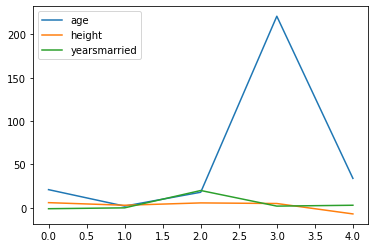

In [41]:
df.plot()